In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Enjia/Nutrition-Facts-for-McDonald-s-Menu/master/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df.isnull().any()

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool

In [4]:
df.shape 

(260, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
Category                         260 non-null object
Item                             260 non-null object
Serving Size                     260 non-null object
Calories                         260 non-null int64
Calories from Fat                260 non-null int64
Total Fat                        260 non-null float64
Total Fat (% Daily Value)        260 non-null int64
Saturated Fat                    260 non-null float64
Saturated Fat (% Daily Value)    260 non-null int64
Trans Fat                        260 non-null float64
Cholesterol                      260 non-null int64
Cholesterol (% Daily Value)      260 non-null int64
Sodium                           260 non-null int64
Sodium (% Daily Value)           260 non-null int64
Carbohydrates                    260 non-null int64
Carbohydrates (% Daily Value)    260 non-null int64
Dietary Fiber                    260 non-null int64
Di

In [6]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


# Count plot 

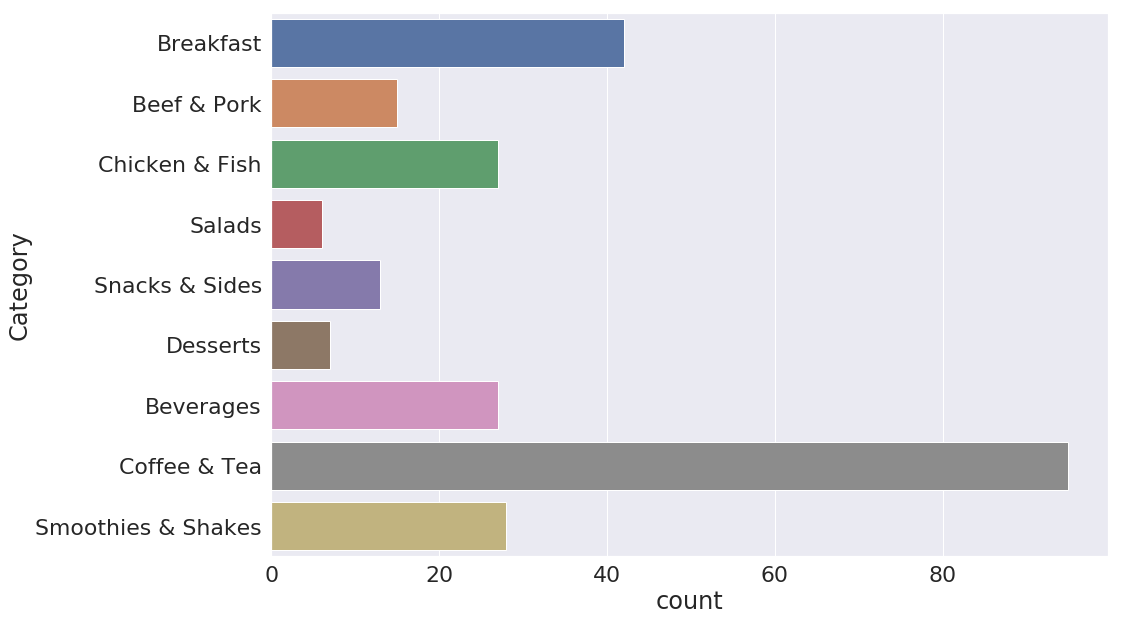

In [7]:
sns.set(font_scale=2)
plt.figure(figsize=(15, 10))
sns.countplot(y='Category', data=df)

# Histogram 

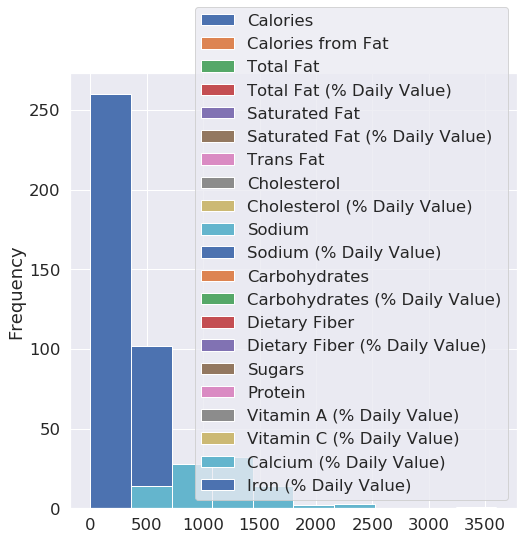

In [13]:
df.plot(kind='hist',figsize=(8,8))

# Heatmap 

Text(0.5, 1.0, 'Pearson Correlation of all Nutrient Elements')

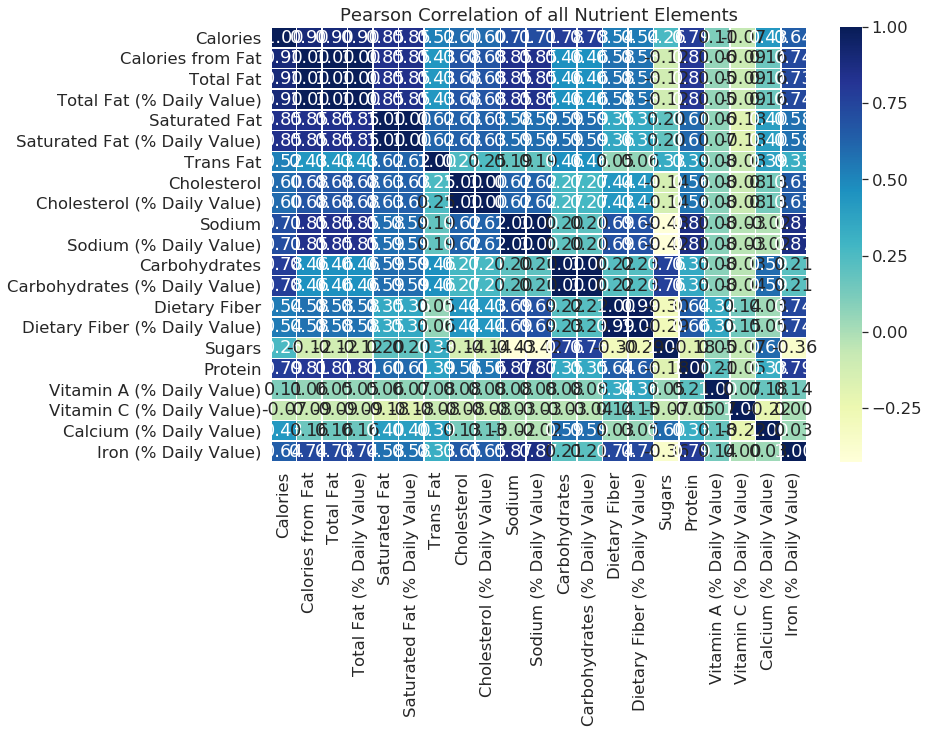

In [19]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
corr = (df.corr())
#cmap = sns.cubehelix_palette(start=1, rot=3, gamma=.8, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap="YlGnBu",annot=True
             ,   linewidths=.5, fmt=".2f")
plt.title("Pearson Correlation of all Nutrient Elements")

# Scatter Plot 

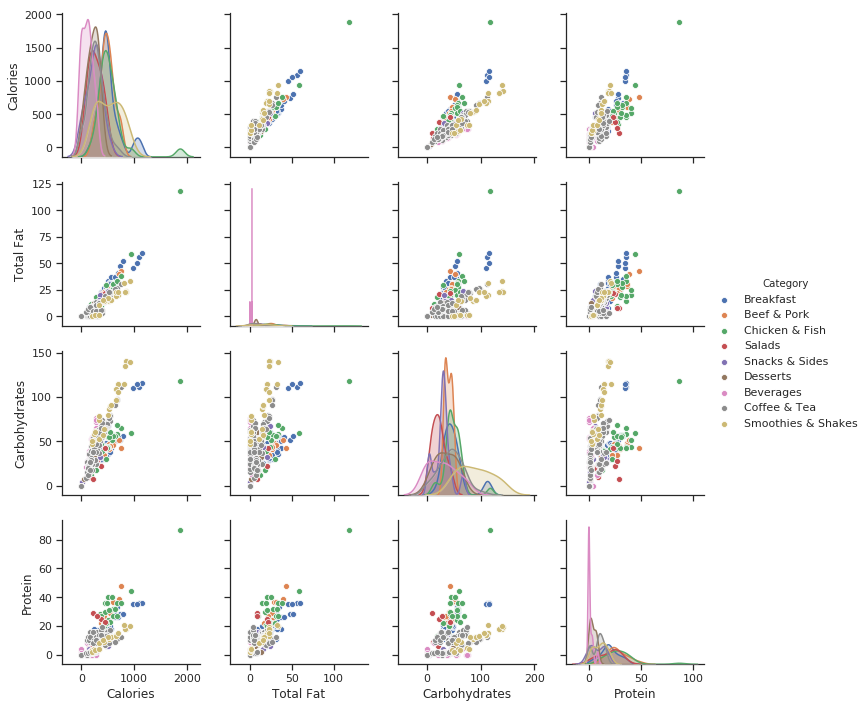

In [38]:
plotData = df[["Category","Calories","Total Fat","Carbohydrates","Protein"]]

sns.set(style="ticks")
sns.pairplot(plotData, hue="Category")

# Pearson's Correlation Matrix

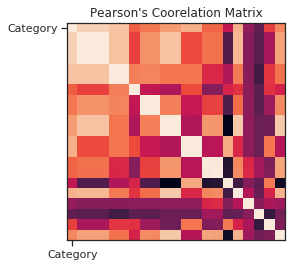

In [9]:
plt.figure()
plt.imshow(df.corr().values)
plt.title("Pearson's Coorelation Matrix")
plt.xticks((range(1)),df.columns)
plt.yticks((range(1)),df.columns)
plt.show()

# Violin plot

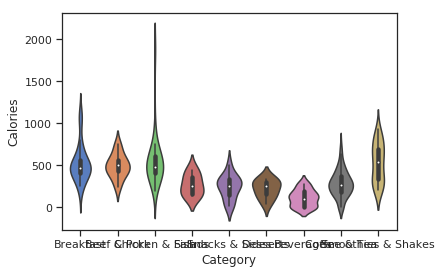

In [18]:
ax = sns.violinplot(x="Category", y="Calories",
                    data=df, palette="muted")

# Distplot

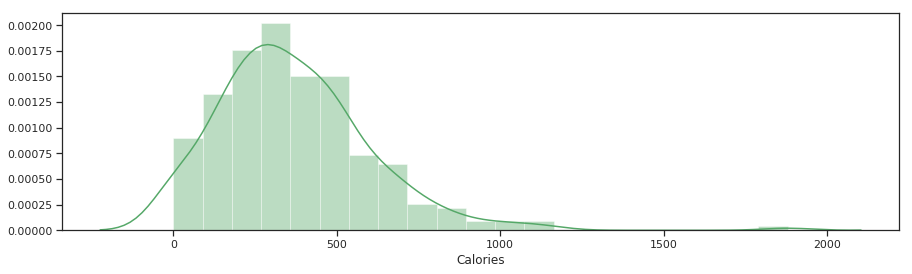

In [51]:
f,axes=plt.subplots (1,1,figsize=(15,4))
sns.distplot(df['Calories'],kde=True,hist=True,color="g")

# Kde plot

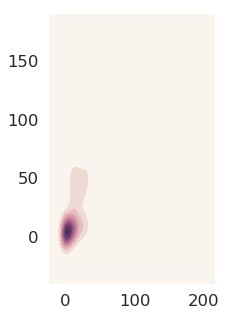

In [36]:
f,axes = plt.subplots(1,1,figsize=(3,5),sharex = True,sharey =True)
s=np.linspace(0,3,10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

x = df['Cholesterol (% Daily Value)'].values
y = df['Sodium (% Daily Value)'].values
sns.kdeplot(x,y,cmap=cmap,shade=True,cut = 5)

# Boxplot

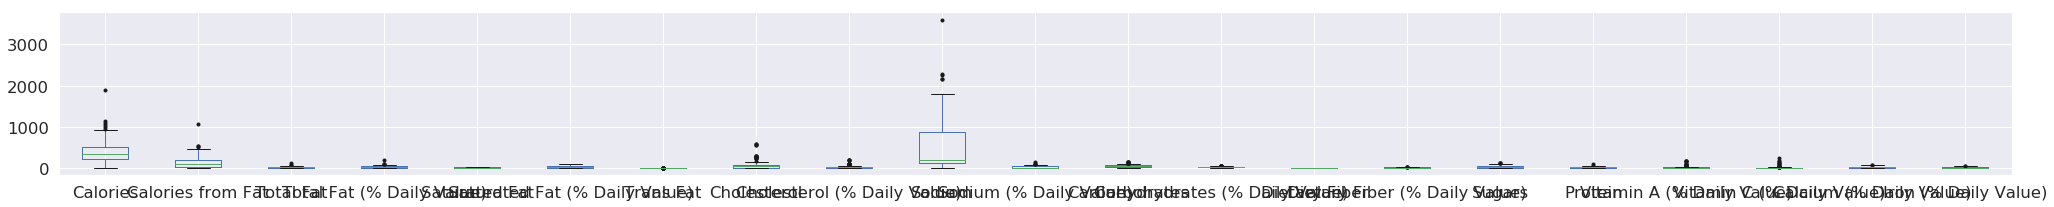

In [34]:
df.plot.box (sym='k.',figsize=(35,3))
plt.show ()